<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/Model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/staff_encoded.csv .


In [50]:
import pandas as pd
staff = pd.read_csv('staff_encoded.csv', sep=';')

In [51]:
staff.head()

,Unnamed: 0,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Accident,wk_position,Age,Severity,Accident_place,Gender_Hombre,T_Turno de mañana,T_Turno de noche,T_Turno de tarde,Age_Entre 30-50,Age_Mayor 50,Age_Menor 30,wk_position_encoded,Tipo_trab_reduced,Acc_Duración Determinada,Acc_ETT,Acc_Indefinido,Acc_Otros
0,0,25249.0,42484.0,1419.3,830.1,1,Material Handler,Entre 30-50,Leve,Mantenimiento,1,1,0,0,1,0,0,415,ETT,0,1,0,0
1,1,25249.0,42484.0,1419.3,830.1,1,customer,Mayor 50,Muy grave,Mantenimiento,1,1,0,0,0,1,0,695,Indefinido,0,0,1,0
2,2,25684.5,18302.3,1150.6,151.5,1,Vaciado contenedores de chatarra,Entre 30-50,Muy grave,Mantenimiento,1,0,0,1,1,0,0,659,Duración Determinada,1,0,0,0
3,3,25684.5,18302.3,1150.6,151.5,1,Pontonero,Entre 30-50,Grave,Mantenimiento,1,1,0,0,1,0,0,537,ETT,0,1,0,0
4,4,0.0,167848.0,1300.5,101.5,1,Longi 2,Entre 30-50,Grave,Mantenimiento,1,1,0,0,1,0,0,320,Otros,0,0,0,1


In [52]:
ceros = staff[staff['Accident'] == 0]['Accident'].count()
unos = staff[staff['Accident'] == 1]['Accident'].count()

(ceros,unos) ## tenemos un conjunto de datos desbalanceado ya que tenemos muchos mas 0 que 1

(17030, 4180)

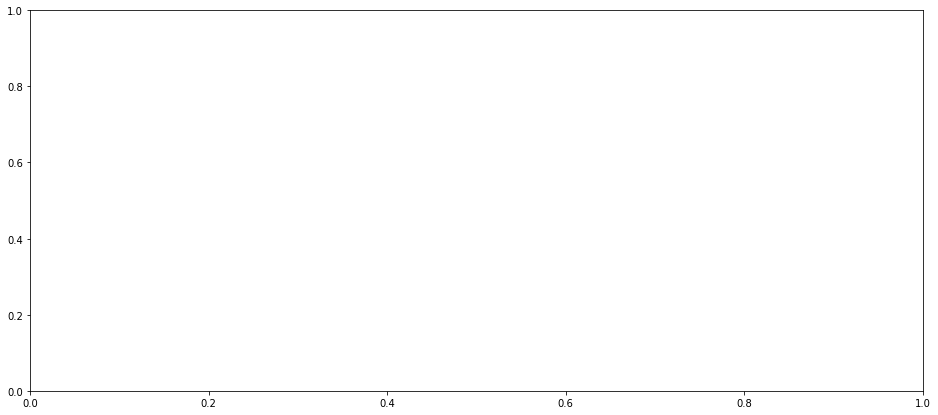

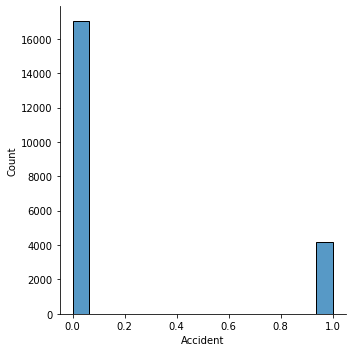

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
y = staff['Accident']
fig, ax = plt.subplots(figsize=(16,7))
sns.displot(y)



### Linear Regression model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


X = staff[['Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs',
       'Gender_Hombre', 'T_Turno de mañana',
       'T_Turno de noche', 'T_Turno de tarde', 'Age_Entre 30-50',
       'Age_Mayor 50', 'Age_Menor 30', 'wk_position_encoded',
        'Acc_Duración Determinada', 'Acc_ETT',
       'Acc_Indefinido', 'Acc_Otros']]

In [55]:
y = staff['Accident']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
len(X_test)

7000

In [58]:
y_train = y_train.apply(str)

y_test = y_test.apply(str)

In [59]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))



Coefficients: 
 [-2.67633360e-06 -1.55970510e-06  6.82094449e-05  1.48323767e-04
  1.49918014e-01  8.82977728e-02 -9.91705566e-02  1.08727839e-02
 -1.72735700e-02  2.28085952e-02 -5.53502523e-03 -9.56767296e-06
 -9.23427080e-02  4.28898092e-02  6.05052243e-02 -1.10523254e-02]
Mean squared error: 0.14
Coefficient of determination: 0.12


## K Nearest Neighbors

In [60]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix


In [61]:
import matplotlib.pyplot as plt

# we are going to import this function from Scikit learn to plot the confussion matriz

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color= "black")
    fig.tight_layout()
    return ax

In [62]:
model = KNeighborsClassifier(n_neighbors=8)
model = model.fit(X_train, y_train)

In [63]:
std_score = model.score(X_test, y_test)
std_score ##this is a very good accuracy of the model

0.8028571428571428

In [64]:
y_pred = model.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      5635
           1       0.48      0.14      0.22      1365

    accuracy                           0.80      7000
   macro avg       0.65      0.55      0.55      7000
weighted avg       0.76      0.80      0.76      7000



## Decision Tree

In [66]:
## check la distribucion de datos de una columna del dataset

import seaborn as sns


In [67]:
y_train = y_train.apply(str).replace('1', 'Yes').replace('0', 'No')

y_test = y_test.apply(str).replace('1', 'Yes').replace('0', 'No')


In [68]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1)

In [69]:
model.fit(X_train, y_train) ## we are going to start without giving any weight to the classes class_weight but then we will try to assign the correspondent weight

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [70]:
y_pred = model.predict(X_test)

In [71]:
comp = pd.DataFrame({'real': y_test, 'preds':y_pred})
comp.head(10) ## parece que esta acertando debido al desbalanceo vamos analizar los casos que deberian de ser 1

,real,preds
16651,No,No
13898,No,No
16269,No,No
7306,No,No
13631,No,No
4609,No,Yes
18063,No,No
408,Yes,No
12181,No,No
3062,Yes,Yes


In [72]:
comp[comp['real']=='Yes'] ##casi siempre esta prediciendo 0 para los casos de 1

,real,preds
408,Yes,No
3062,Yes,Yes
936,Yes,No
44,Yes,Yes
447,Yes,Yes
...,...,...
1246,Yes,No
800,Yes,No
2074,Yes,No
1483,Yes,No


In [73]:
## lets check the percentge of accuracy

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc ## this accuracy is good but our problem is that it is very import to us to identify those cases with an accident so we need to better up our prediction on those

0.7642857142857142

Confusion matrix, without normalization
[[4821  814]
 [ 836  529]]


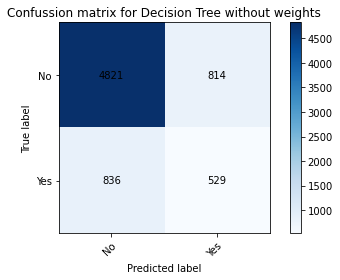

In [74]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for Decision Tree without weights')

Here we are going to perform a GridSearchCV to find th best hiperparameters for our dataset.

In [ ]:
from sklearn.model_selection import GridSearchCV

clf_dt = GridSearchCV(DecisionTreeClassifier(),
                      param_grid={"min_samples_leaf":np.arange(1,100),
                                 'max_depth': np.arange(2, 20)},
                     cv = 10,
                     scoring = "accuracy")

In [ ]:
clf_dt.best_score_


0.8294159042927515

In [ ]:
clf_dt.best_params_

{'max_depth': 9, 'min_samples_leaf': 30}

In [ ]:
clf_dt.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='d...
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12

Now we are going to  run the model again but with the class weights according to the frequency of the classes to try to balance them and achieve better results

In [75]:
## lets check frequencies
staff['Accident'] = staff['Accident'].apply(str).apply(lambda x: x.replace('1', 'Yes').replace('0', 'No'))
counts = staff['Accident'].replace('1', 'Yes').replace('0','No').astype(str).value_counts().to_dict()
print(counts)



{'No': 17030, 'Yes': 4180}


In [76]:

model = DecisionTreeClassifier(random_state=1, class_weight =counts, max_depth= 9, min_samples_leaf = 30)
model.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight={'No': 17030, 'Yes': 4180},
                       criterion='gini', max_depth=9, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=30,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [77]:
y_pred = model.predict(X_test)
comp_2 = pd.DataFrame({'real': y_test, 'preds':y_pred})
comp_2[comp_2['real']=='Yes'] ## it seems it has increase accuracy, lets check

,real,preds
408,Yes,No
3062,Yes,No
936,Yes,No
44,Yes,No
447,Yes,No
...,...,...
1246,Yes,No
800,Yes,No
2074,Yes,No
1483,Yes,No


In [78]:
acc = accuracy_score(y_test, y_pred)
acc 

0.805

In [79]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5635,    0],
       [1365,    0]])

If we add the best parameter the accuracy is increasing bt because it is never predicting value 'yes' so it is not working correctly

Confusion matrix, without normalization
[[5635    0]
 [1365    0]]


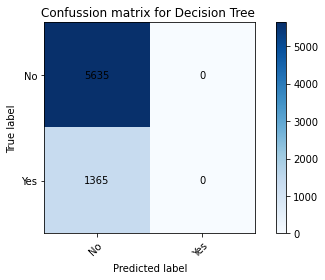

In [80]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for Decision Tree ')

In [81]:
##lets try without them

model = DecisionTreeClassifier()
model = DecisionTreeClassifier(random_state=1, class_weight =counts)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={'No': 17030, 'Yes': 4180},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [82]:
y_pred = model.predict(X_test)


Confusion matrix, without normalization
[[4784  851]
 [ 812  553]]


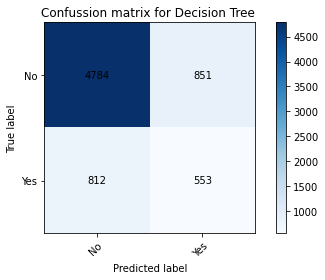

In [83]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for Decision Tree ')

In [84]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

scores = cross_validate(model, X_test, y_test, scoring ='f1_macro')

In [85]:
scores ## if we look at the test_score it is around .6 which is bad

{'fit_time': array([0.037714  , 0.02632785, 0.02704883, 0.02510715, 0.02842379]),
 'score_time': array([0.01826119, 0.01107311, 0.00934029, 0.0098505 , 0.01065683]),
 'test_score': array([0.59631006, 0.62453935, 0.6324076 , 0.60321292, 0.61689319])}

Now we are going to try to over sample our minority class to balance our classes and achieve better results

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [88]:
from collections import Counter

counter = Counter(y)

for k, v in counter.items():
  dist = v / len(y)* 100
  print(f'Class={k}, n={v}, ({dist}%)')

Class=1, n=17030, (50.0%)
Class=0, n=17030, (50.0%)


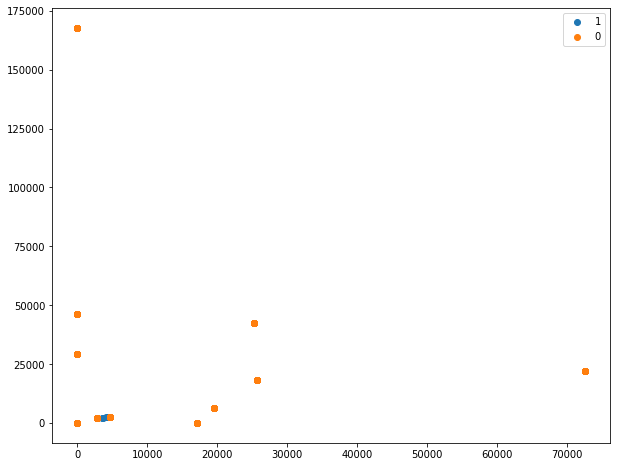

In [89]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10,8))

for label, _ in counter.items():
  row = np.where(y==label)[0]
  plt.scatter(X[row, 0], X[row, 1], label=str(label))


plt.legend()

In [90]:
## we are going to run the model again with this oversample data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
model = DecisionTreeClassifier()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Confusion matrix, without normalization
[[4723  897]
 [ 867 4753]]


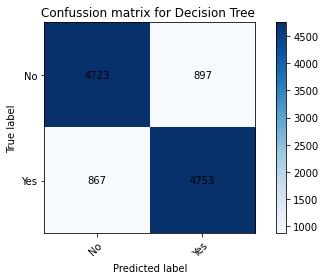

In [92]:
y_pred = model.predict(X_test)
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confussion matrix for Decision Tree ')

In [93]:
scores = cross_validate(model, X_test, y_test, scoring ='f1_macro')
scores ## our model has increased positively its test score with going around now a .8 which is a good result

{'fit_time': array([0.03548861, 0.02984858, 0.02835703, 0.03158092, 0.02951241]),
 'score_time': array([0.00228357, 0.0024035 , 0.00234318, 0.00220394, 0.0038414 ]),
 'test_score': array([0.8273856 , 0.83717302, 0.83807368, 0.83095965, 0.82562222])}

# Random Forest Algorithm

We are going to perform this algorithm with the balanced data we have generated before, so we are going to be using same partitions

In [94]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
model.score(X_test, y_test) 

0.851779359430605

In [97]:
y_predicted = model.predict(X_test)

Confusion matrix, without normalization
[[4779  841]
 [ 825 4795]]


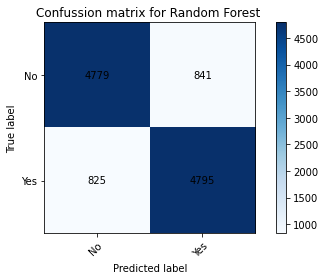

In [98]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_predicted, classes=classes, title='Confussion matrix for Random Forest ')

### hyperparameter optimization

Now we are going to apply a GridSearch CV to try maximize performance in our algorithm and be able to apply the hiperparamethers that best fits our model

In [125]:
param_grid={"min_samples_leaf": [1,20], #min number of samples required at each leaf code
            'n_estimators': [int(x) for x in np.linspace(start=10, stop=80, num=10)], # number of trees in random forest
            'max_depth': np.arange(2,10), #number of levels in the tree
            'min_samples_split': [2,5]} # min number of samples required to split a node 

In [126]:
from sklearn.model_selection import GridSearchCV

clf_rt = GridSearchCV(RandomForestClassifier(),
                      param_grid=param_grid,cv = 3,scoring = "accuracy",n_jobs = 4, verbose = 2)

In [127]:
clf_rt.fit(X, y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   51.8s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  7.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [128]:
clf_rt.best_score_

0.8265174220803041

In [131]:
clf_rt.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 64}

In [129]:
clf_rf_good = clf_rt.best_estimator_


By the feature importances method we can observe how each variable impacts the decisions taken by the random forest

In [130]:
clf_rf_good.feature_importances_


array([0.0157848 , 0.08560055, 0.03337919, 0.0317409 , 0.03067166,
       0.18939674, 0.16170725, 0.08241546, 0.05133024, 0.06373112,
       0.03046899, 0.01026766, 0.03317828, 0.02131784, 0.07477561,
       0.08423372])

Now we are going to run the algorithm with the best parameter we got from the GridSearchCV

In [132]:
model = RandomForestClassifier(max_depth= 9 , min_samples_leaf= 1, min_samples_split= 2, n_estimators= 64)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
model.score(X_test, y_test) ## with the best parameters from the GridSearchCV we only got a increment from 0.85 to 0.86

0.868594306049822

In [134]:
y_predicted = model.predict(X_test)

Confusion matrix, without normalization
[[5102  518]
 [ 959 4661]]


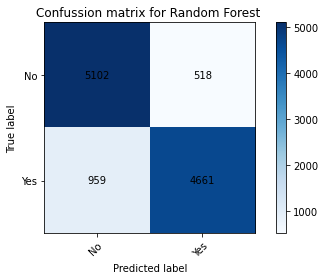

In [135]:
classes = ['No', 'Yes']
plot_confusion_matrix(y_test, y_predicted, classes=classes, title='Confussion matrix for Random Forest ')

# Ploting the learning curve

The learning curve visualize the effect of the number of observatiosn on the performance metric

In [136]:
from sklearn.model_selection import learning_curve



In [148]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv = 3, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy', verbose=1)

[learning_curve] Training set sizes: [ 2270  7379 12488 17597 22706]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   22.2s finished


In [149]:
import numpy as np

train_mean = np.mean(train_scores, axis = 1)
train_mean

array([1.        , 0.99525681, 0.99241939, 0.99257449, 0.9941572 ])

In [150]:
train_std = np.std(train_scores, axis = 1)
train_std

array([0.        , 0.0033544 , 0.0053619 , 0.00520016, 0.004063  ])

In [151]:
test_mean = np.mean (test_scores, axis = 1)
test_mean

array([0.5       , 0.70358789, 0.78547115, 0.83121382, 0.83943415])

In [152]:
test_std = np.std(test_scores, axis = 1)

test_std

array([3.59595077e-05, 1.43961653e-01, 1.04270427e-01, 1.00806178e-01,
       8.98018668e-02])

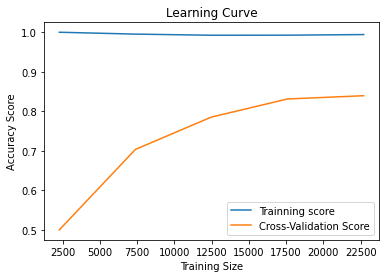

In [153]:
plt.plot(train_sizes, train_mean, label = 'Trainning score') #train accuracy
plt.plot(train_sizes, test_mean, label = 'Cross-Validation Score') #training accuracy

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')